In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
x = np.linspace(0,2, 10)
y = x**2

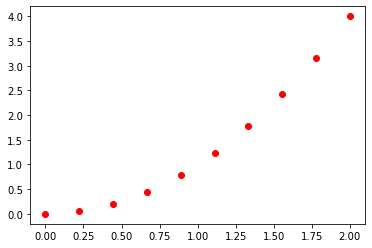

In [21]:
plt.scatter(x, y, c='red', lw=1)

# Interpolate

In [22]:
# https://docs.scipy.org/doc/scipy/reference/index.html

from scipy.interpolate import interp1d

### Lineair / Quadratic

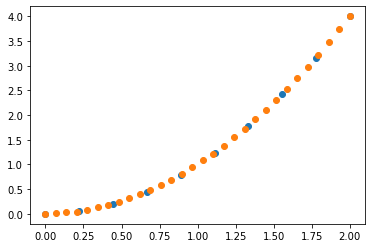

In [23]:
f = interp1d(x, y, kind='linear')

new_x = np.linspace(0, 2, 30)
result=f(new_x)

plt.scatter(x,y)
plt.scatter(new_x, result)

### Periodic / cubic

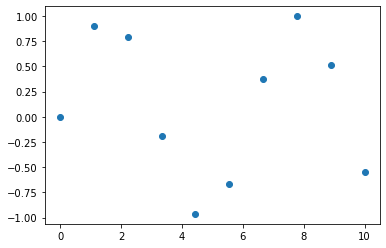

In [24]:
x = np.linspace(0, 10, 10)
y = np.sin(x)

plt.scatter(x, y)

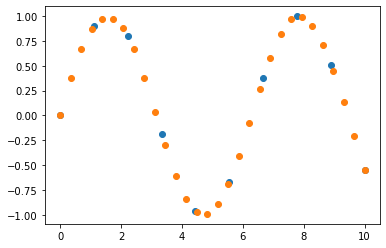

In [25]:
f = interp1d(x, y, kind='cubic')

new_x = np.linspace(0, 10, 30)
result = f(new_x)

plt.scatter(x, y)
plt.scatter(new_x, result)

# Optimize 

### MCO

In [30]:
# https://docs.scipy.org/doc/scipy/reference/optimize.html

from scipy import interpolate
from scipy import optimize

In [27]:
x = np.linspace(0, 2, 100)
y = 1/3 * x **3 - 3/5 * x ** 2 + 2 + np.random.randn(x.shape[0])/20

In [28]:
def f (x, a, b , c, d):
    return a * x ** 3 + b * x ** 2 + c * x + d

In [31]:
params, params_cov = optimize.curve_fit(f, x, y)

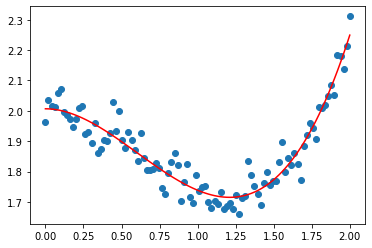

In [32]:
plt.scatter(x, y)
plt.plot(x, f(x, params[0], params[1], params[2], params[3]), c="red")

### Minimisation

In [16]:
def f(x):
    return x**2 + 15*np.sin(x)

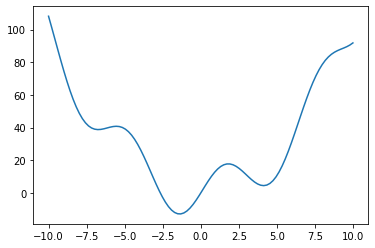

In [17]:
x = np.linspace(-10,10, 100)
plt.plot(x, f(x))

In [18]:
# Trouve le minimum local

optimize.minimize(f, -8)

NameError: name 'optimize' is not defined

In [68]:
# Basé sur l'analyse graphique, on peut simplement déplacer notre point de départ

optimize.minimize(f, -2)

      fun: -12.823616887804784
 hess_inv: array([[0.05972692]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([-1.38505605])

# Traitement de signal / Fourier

### Detrend

In [80]:
from scipy import signal

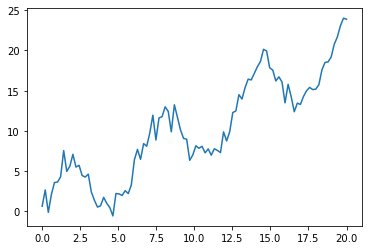

In [79]:
x = np.linspace(0, 20, 100)
y = x + 4*np.sin(x) + np.random.randn(x.shape[0])

plt.plot(x ,y)

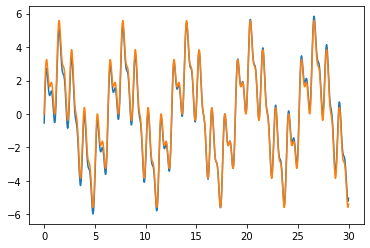

In [102]:
new_y =  signal.detrend(y)
plt.plot(x, new_y)
plt.plot(x, y)

### Fourirer Analysis

In [86]:
from scipy import fftpack

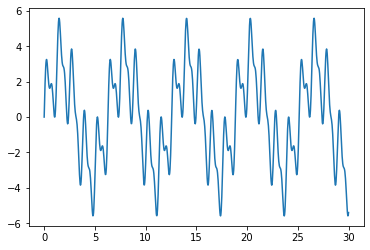

In [92]:
x = np.linspace(0, 30, 1000)
y = 3*np.sin(x) + 2*np.sin(5*x) + np.sin(10*x)
plt.plot(x, y)

C:\Users\witec\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


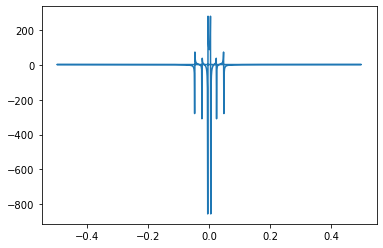

In [100]:
fourier = fftpack.fft(y)
freq = fftpack.fftfreq(y.size)
plt.plot(freq, fourier)

# Le problème est que l'on obtient des fréquences et des amplitudes négatives

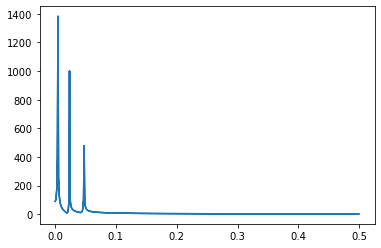

In [101]:
# On créer donc un variable power qui est égale a la valeur absolue pour filtrer tout ca

power = np.abs(fourier)
plt.plot(np.abs(freq),power)

## On obtient alors le spectre qui nous intéresse

In [ ]:
# Ce qui nous sert alors notamment à filter un signal 

## On commence par filter notre signal comme fait au dessus pour obtenir le spectre

### On utilise ensutie du booléan indexing pour éliminer de ce spectre toutes les valeurs qui sont inférieurs à un certain seuil
### On obtient alors un spectre nettoyé

#### Et enfin, on utilise ce spectre et d'y appliquer la transformation de Fourier inverse


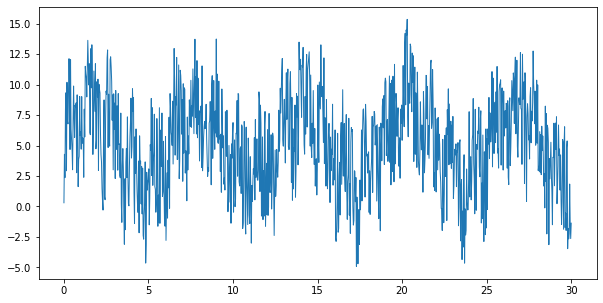

In [124]:
x = np.linspace(0, 30, 1000)
y = 3*np.sin(x) + 2*np.sin(5*x) + np.sin(10*x) + np.random.random(x.shape[0])*10
plt.figure(figsize=(10,5))
plt.plot(x, y, lw=1)

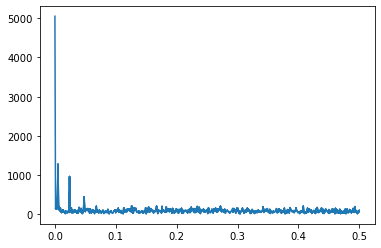

In [105]:
fourier = fftpack.fft(y)
freq = fftpack.fftfreq(y.size)
power = np.abs(fourier)
plt.plot(np.abs(freq),power)

In [106]:
fourier[power<400]=0

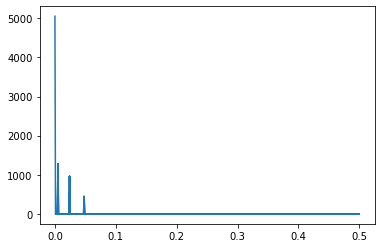

In [108]:
plt.plot(np.abs(freq),np.abs(fourier))

In [110]:
result = fftpack.ifft(fourier)

C:\Users\witec\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


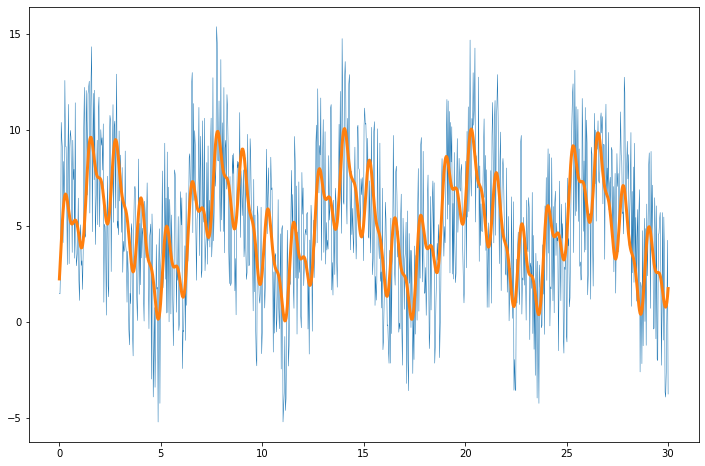

In [118]:
plt.figure(figsize=(12,8))
plt.plot(x, y, lw=0.5)
plt.plot(x, result, lw=3)


# Traitement d'images / nd image

In [125]:
# https://docs.scipy.org/doc/scipy/reference/ndimage.html

from scipy import ndimage

### Morphology

In [ ]:
# C'est un techinique mathématique qui permet de transformer des matrices et donc des images
## On définit un structure, qui va se déplacer de pixel en pixel sur notre iamge. (souvent une croix)
### L'orsque qu'elle rencontre un pixel blanc, soit elle imprime des pixel blancs autour d'elle d'après sa forme, c la'dilation'
### Ou bien elle va effacer les pixels autour d'elle, c l'errosion

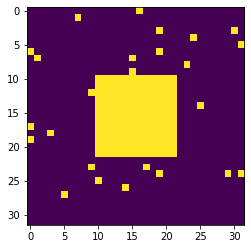

In [126]:
# On peut utiliser ces techniques pour enlever les petits artéfacts qu'on aurait sur une image 

np.random.seed(0)
X = np.zeros((32,32))
X[10:-10, 10:-10]=1
X[np.random.randint(0,32,30), np.random.randint(0,32,30)]=1
plt.imshow(X)

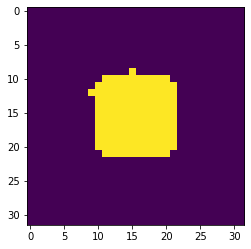

In [130]:
# opening est la combinaison entre errosion et dilation

open_x = ndimage.binary_opening(X)
plt.imshow(open_x)

# Application 

In [ ]:
# On va essayer de faire Trois choses :
## 1_ Extraire les informations de l'arrière plan de la photo 
## 2_ Utiliser les techniques de morphology pour enlever des artefacts qu'il pourrait y avoir
## 3_ Mesurer la taille de chacun des éléments de notre fonctions pour finalement représenter tout ca graphiquement

(514, 556, 3)

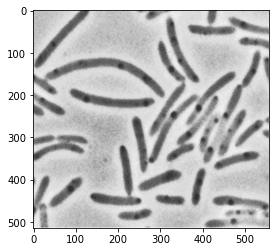

In [205]:
image = plt.imread('Sans titre.png')
plt.imshow(image)
image.shape

# La photo est donc en trois dimensions, ce qui est problématique

(514, 556)

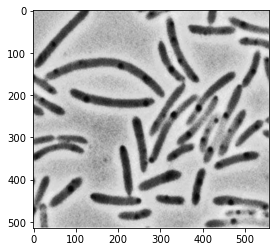

In [206]:
# On commence donc par réduire à 2D notre image

image = image[:,:,0]
plt.imshow(image, cmap='gray')
image.shape

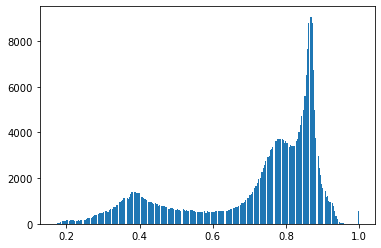

In [207]:
# On extrait maintenant les bactéries en utilisant du booléan indexing
## On a donc besoin d'applatir notre image
## On va alors créer un copie pour pouvoir ensuitre travailler sur notre image originale

image_2 = np.copy(image)
plt.hist(image_2.ravel(), bins=255)
plt.show()

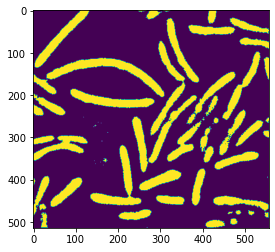

In [217]:
# En comparant notre image et les résultats de notre histogramme, on comprends que l'on va vouloir filtrer autour de 0,6

image2 = image < 0.6

## On obtien alors un masque 

plt.imshow(image2)

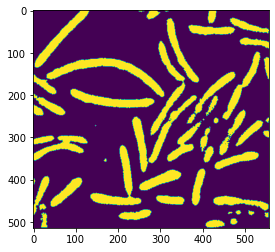

In [218]:
# On souhaite maintenant se débrasser de nos artefacts, on reprend notre code 'opening'

open_x = ndimage.binary_opening(image2)
plt.imshow(open_x)

In [219]:
# Mainteant que l'on a bien séparer le fond de ce qui nous intéresse
## On va utiliser la fonction label pour segmenter cette image et ainsi mettre une étiquetter sur chacune des bactéries

label_image, label = ndimage.label(open_x)
label

# Le programme reconnait donc 57 groupe différents sur notre image, donc ici 57 bactéries différentes

57

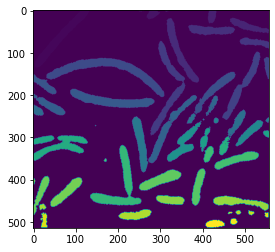

In [220]:
# On peut les visualiser avec imshow

plt.imshow(label_image)

In [225]:
# Enfin, pour mesuer la taille de ces groupes, on utilise la fonction sum qui va comtper le nombre de pixel de chaque groupe

size = ndimage.sum(open_x, label_image, range(label))
size.shape

# On a alors un tableau numpy de 57 éléments représentant chacun une taille (un nb de pixel)

(57,)

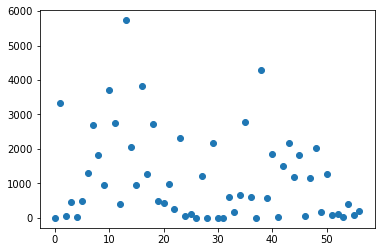

In [226]:
plt.scatter(range(label), size)

# A partir de la on a donc un dataset, on pourrait alors faire une moyenne, des stats, calculer un écart type